# ResNet Model - Transfer Learning

### Imports

In [1]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms as T
from torchvision.models import resnet18, ResNet18_Weights
from utils import data, eval, train

### Initialize Dataset

In [2]:
# Constants
DATA_DIR = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train'
SAVE_MODEL_FILE = 'models/cnn.pt'
SEED = 0
NUM_SAMPLES = 1000
DATASET_SPLIT = [0.7, 0.15, 0.15] # Train / Valid / Test Split
BATCH_SIZE = 100
LEARN_RATE = 5e-4
EPOCHS = 10
IMAGE_SIZE = (100, 100)
WEIGHT_DECAY = 1e-3

In [3]:
# Seed PyTorch
torch.manual_seed(SEED)

# Image transforms
trans = T.Compose([
    T.ToTensor(),
    T.Resize(IMAGE_SIZE),
    T.Normalize((0.5190, 0.4992, 0.5140), 
                (0.2244, 0.2523, 0.2616))
])

# Initialize datasets
dataset = torchvision.datasets.ImageFolder(
    root=DATA_DIR,
    transform=trans
)

# Split dataset into training, validation and test sets
train_loader, valid_loader, test_loader = data.split_dataset(dataset, NUM_SAMPLES, DATASET_SPLIT, BATCH_SIZE, SEED)

# Check for CUDA GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


### Model

In [4]:
# Instantiate model and move to GPU if available
model = torchvision.models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

### Training

In [5]:
# Train model and save model weights and training metrics
metrics = train.train_model(model, train_loader, valid_loader, LEARN_RATE, EPOCHS, device, WEIGHT_DECAY, conv=True)
data.save_model(SAVE_MODEL_FILE, model, metrics)

Train Progress: |████████████████████████████████████████| 100.0%
Valid Progress: |████████████████████████████████████████| 100.0%
Epoch 1 | Loss = 5.5682 | Train Accuracy = 23.57% | Test Accuracy = 24.67% | Time = 0:00:13
Train Progress: |████████████████████████████████████████| 100.0%
Valid Progress: |████████████████████████████████████████| 100.0%
Epoch 2 | Loss = 0.7138 | Train Accuracy = 81.43% | Test Accuracy = 60.67% | Time = 0:00:03
Train Progress: |████████████████████████████████████████| 100.0%
Valid Progress: |████████████████████████████████████████| 100.0%
Epoch 3 | Loss = 0.1755 | Train Accuracy = 95.14% | Test Accuracy = 76.67% | Time = 0:00:02
Train Progress: |████████████████████████████████████████| 100.0%
Valid Progress: |████████████████████████████████████████| 100.0%
Epoch 4 | Loss = 0.0579 | Train Accuracy = 99.29% | Test Accuracy = 80.00% | Time = 0:00:02
Train Progress: |████████████████████████████████████████| 100.0%
Valid Progress: |█████████████████████

### Evaluation

Final Train Accuracy = 100.00%
Final Test Accuracy  = 86.00%
Average Epoch Time   = 4.03s


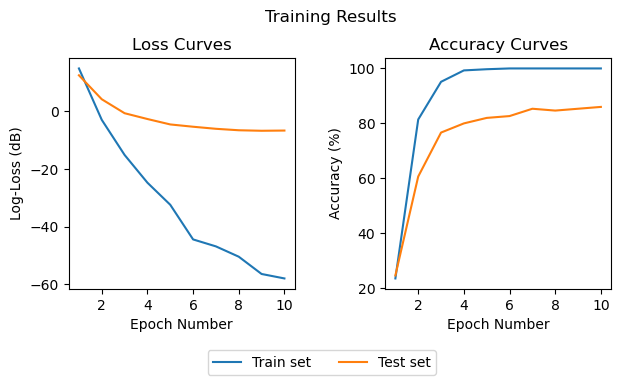

In [6]:
# Load model and show trainig and evaluation metrics
metrics = data.load_model(SAVE_MODEL_FILE, model)
eval.plot_metrics(metrics)

Precision = 0.8729
Recall = 0.8490
F1 = 0.8464
Accuracy = 0.8480


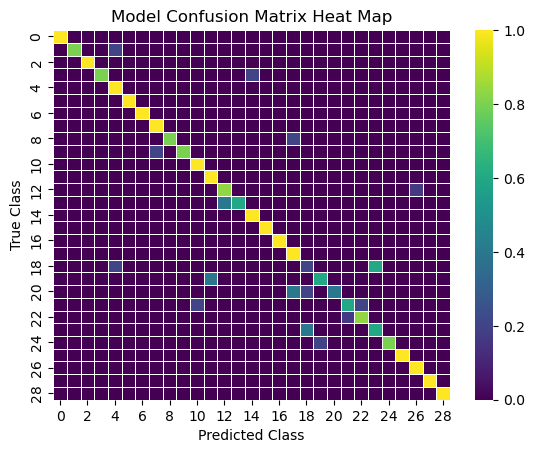

In [7]:
eval_metrics = eval.eval_model(model, test_loader, device, conv=True)